<a href="https://colab.research.google.com/github/tsbslteisrhy/Bigdata/blob/master/tf11_auto_encoder_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 유효진
내용 : 딥러닝 오토인코더(AutoEncoder) MNIST 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Encoder 모델구성
encoder_inputs = Input(shape=(784,))
encoder_hidden = Dense(32, activation='relu')(encoder_inputs)
encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Decoder 모델구성
decoder_inputs = Dense(2)(encoder_outputs)
decoder_hidden = Dense(32, activation='relu')(decoder_inputs)
decoder_outputs = Dense(784)(decoder_hidden)

#decoder_model = Model(decoder_inputs, decoder_outputs)
#decoder_model.summary()

In [ ]:
#auto_encoder : encoder_model과 decoder_model 합치기

# 인코더, 디코더 모델구성
auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_17 (Dense)             (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
_________________________________________________

In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train,
                 x_train,
                 epochs=10,
                 batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0643
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0546
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0524
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0510
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0502
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0495
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0489
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0483
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0479
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0476


In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[-0.00048506,  0.00018059,  0.0004016 , ..., -0.00156181,
        -0.0011311 , -0.00038267],
       [ 0.00099583,  0.00306734, -0.00045056, ...,  0.00321491,
        -0.00171928,  0.00180353],
       [ 0.0008397 ,  0.00449068,  0.00197494, ...,  0.00371546,
        -0.00390101, -0.00157777],
       ...,
       [ 0.00018646,  0.00289661, -0.00168362, ...,  0.00285654,
        -0.00149043,  0.0018528 ],
       [-0.00063547,  0.00369721, -0.0011006 , ...,  0.00188171,
        -0.00194033, -0.00055339],
       [ 0.00096162, -0.00044281, -0.00045969, ...,  0.00065119,
        -0.00236069,  0.00234725]], dtype=float32)

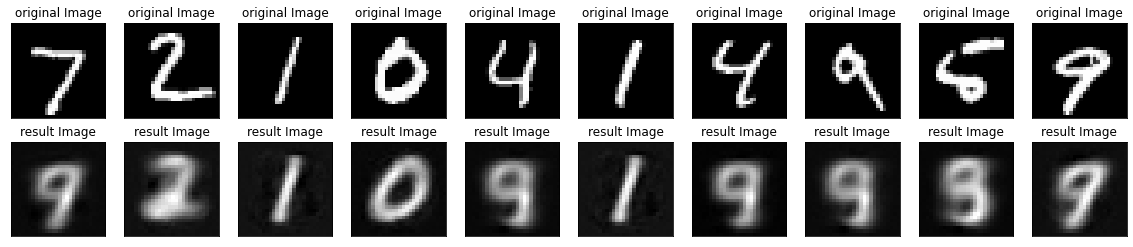

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
# 인코더 모델 학습하기 : 구조가 안 맞아서 에러 발생
#encoder_model.compile(optimizer='adam', loss='mse')
#encoder_model.fit(x_train, x_train, epochs=3, batch_size=256)

# 인코더 모델로 결과 출력
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[ 1.4715112 , -4.3731585 ],
       [-3.1953416 , -4.6542425 ],
       [-6.3501935 , -2.171413  ],
       ...,
       [ 1.7796075 , -6.810996  ],
       [-0.60226446, -4.7534385 ],
       [ 7.8332314 , -4.2680097 ]], dtype=float32)

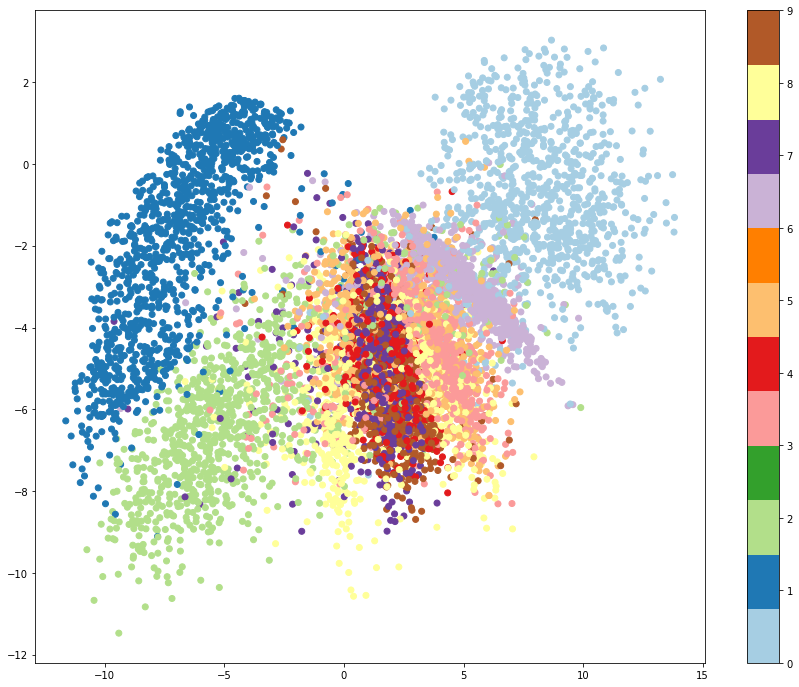

In [ ]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], y=encoder_pre_result[:, 1], c=y_test, cmap=plt.get_cmap('Paired'))
plt.colorbar()